In [2]:
import pandas as pd # data processing
import seaborn as sns
import numpy as np #linear algebra
import matplotlib.pyplot as plt #visualization
import copy

# Data Overview

In [3]:
telcom = pd.read_csv("PersonalLoan.csv")
print("Rows : "  , telcom.shape[0]) 
print("\nColumns : "  , telcom.shape[1])
print("\nFeatues of the dataset :\n" , telcom.columns.tolist())
print ("\nUnique values :  \n",telcom.nunique()) # prints number of unique values

# size of the data

Rows :  5000

Columns :  14

Featues of the dataset :
 ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']

Unique values :  
 ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Personal Loan            2
dtype: int64


In [4]:
telcom.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account     object
CD Account             object
Online                 object
CreditCard             object
Personal Loan          object
dtype: object

In [5]:
telcom.isnull().values.any() # whether any null values are present or not


False

In [6]:
telcom.isnull().sum() # if yes this gives the count of NAN values present in each column

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

# Data Cleaning

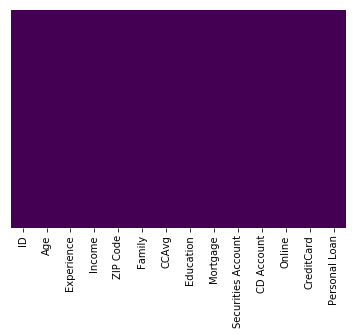

In [7]:
sns.heatmap(telcom.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#checking if there is any missing data

In [8]:
#column total charges has type as object.I suspect some blank values here. Let's go ahead and check for blank values.
telcom.TotalCharges = telcom.TotalCharges.replace(" ",np.nan)
telcom.TotalCharges.isnull().sum()

AttributeError: 'DataFrame' object has no attribute 'TotalCharges'

In [9]:
telcom['Personal Loan'].replace(to_replace="Yes", value=1, inplace=True)
telcom['Personal Loan'].replace(to_replace="No",  value=0, inplace=True)
telcom.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,Yes,No,No,No,0
1,2,45,19,34,90089,3,1.5,1,0,Yes,No,No,No,0
2,3,39,15,11,94720,1,1.0,1,0,No,No,No,No,0
3,4,35,9,100,94112,1,2.7,2,0,No,No,No,No,0
4,5,35,8,45,91330,4,1.0,2,0,No,No,No,Yes,0


In [10]:
#dropping rows with null values as they are too less as compared to the total number of rows in the data.
telcom.dropna(axis='rows' ,inplace = True)
telcom.TotalCharges.isnull().sum()

AttributeError: 'DataFrame' object has no attribute 'TotalCharges'

In [952]:
#Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
telcom["tenure"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

In [953]:
telcom.TotalCharges= telcom.TotalCharges.astype(float)
telcom.drop(['customerID'],axis=1,inplace=True)

In [11]:
telcom.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,Yes,No,No,No,0
1,2,45,19,34,90089,3,1.5,1,0,Yes,No,No,No,0
2,3,39,15,11,94720,1,1.0,1,0,No,No,No,No,0
3,4,35,9,100,94112,1,2.7,2,0,No,No,No,No,0
4,5,35,8,45,91330,4,1.0,2,0,No,No,No,Yes,0


In [955]:
# cat_cols = telcom[['InternetService','Contract','PaymentMethod','tenure']]
# cat_cols.shape
# cat_cols = pd.get_dummies(cat_cols)

In [956]:
# cat_cols=cat_cols.reset_index(drop=True)
# cat_cols.shape
# telcom_final = pd.concat([telcom, cat_cols], axis=1)
# telcom_final.TotalCharges.isnull().sum()
# telcom_final.dropna(axis='rows' ,inplace = True)


In [957]:
telcom_copy = copy.deepcopy(telcom)

In [958]:
telcom_x = telcom_copy.drop(['Churn'],axis=1)

In [959]:
telcom_dummies_X = pd.get_dummies(telcom_x)
telcom_dummies_X.dropna(axis='rows' ,inplace = True)
telcom_dummies_X.isnull().sum()

SeniorCitizen                              0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
tenure_Tenure_0-12                         0
tenure_Tenure_12-24                        0
tenure_Tenure_24-48                        0
tenure_Tenure_48-60                        0
tenure_Tenure_gt_60                        0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecu

# Exploratory Data Analysis

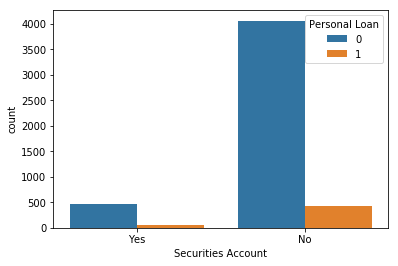

In [14]:
p = sns.countplot(data=telcom, x = 'Securities Account',hue = 'Personal Loan')
#Maximum Number of Customer Churns happened when the customer was using ElectronicCheck as its payment Method

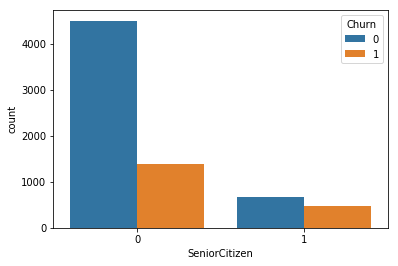

In [961]:
p = sns.countplot(data=telcom, x = 'SeniorCitizen',hue = 'Churn')

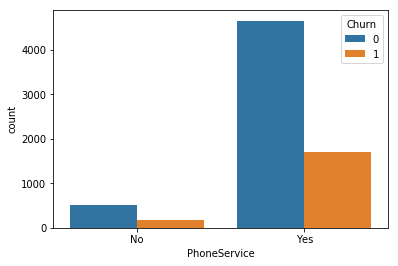

In [962]:
p = sns.countplot(data=telcom, x = 'PhoneService',hue = 'Churn')

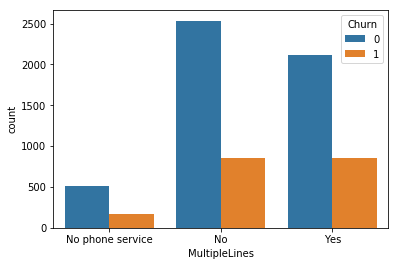

In [963]:
p = sns.countplot(data=telcom, x = 'MultipleLines',hue = 'Churn')

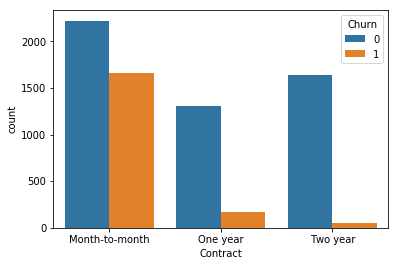

In [964]:
p = sns.countplot(data=telcom, x = 'Contract',hue = 'Churn')

People who used Telco services for a longer time were unlikely to opt out from the service.
The long-term customer service was more effective.

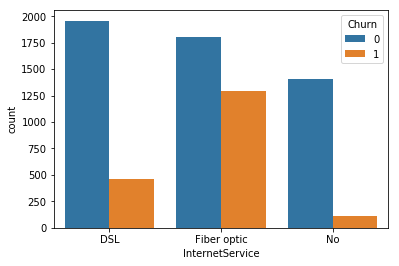

In [965]:
p = sns.countplot(data=telcom, x = 'InternetService',hue = 'Churn')

Looks like people using Fibre Optics might have had issues with their service and therefore decided to opt out.

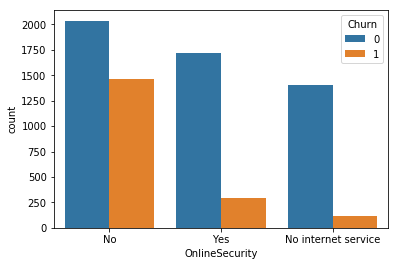

In [966]:
p = sns.countplot(data=telcom, x = 'OnlineSecurity',hue = 'Churn')

This is very intiutive as people with no Online Security are more likely to opt out.

Text(0.5, 1.0, 'Distribution of total charges by churn')

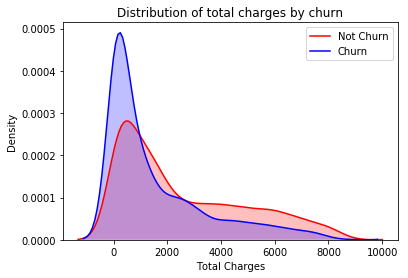

In [967]:
ax = sns.kdeplot(telcom_final.TotalCharges[(telcom_final["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(telcom_final.TotalCharges[(telcom_final["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

the churn is more when the total charges are on the lower end. This means that people are more likely 
to opt out if they lose less amount of money in case leave.

Text(0.5, 1.0, 'Distribution of total charges by churn')

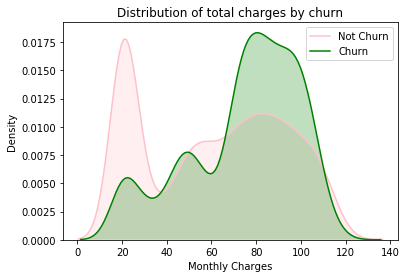

In [968]:
ax = sns.kdeplot(telcom_final.MonthlyCharges[(telcom_final["Churn"] == 0) ],
                color="Pink", shade = True)
ax = sns.kdeplot(telcom_final.MonthlyCharges[(telcom_final["Churn"] == 1) ],
                ax =ax, color="Green", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of total charges by churn')

Clearly, the churn is more when the monthly charges are more.

In [969]:
telcom_stats = telcom.describe()

In [970]:
telcom_stats.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,64.798208,2283.300441,0.265785
std,0.368844,30.085974,2266.771362,0.441782
min,0.000000,18.250000,18.800000,0.000000
25%,0.000000,35.587500,401.450000,0.000000


In [971]:
telcom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,Tenure_0-12,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,Tenure_24-48,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,Tenure_0-12,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,Tenure_24-48,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,Tenure_0-12,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [972]:
telcom.corr()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.219874,0.102411,0.150541
MonthlyCharges,0.219874,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.651065,1.000000,-0.199484
Churn,0.150541,0.192858,-0.199484,1.000000


In [973]:
telcom_copy = copy.deepcopy(telcom_final)

In [974]:
df_x = telcom_dummies_X
df_x.shape

(7032, 49)

In [990]:
df_y = telcom['Churn']
df_y.shape

(7032,)

In [976]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = df_x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(df_x)
df_x = pd.DataFrame(scaler.transform(df_x))
df_x.columns = features

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [977]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [978]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [979]:
y_pred = model.predict(X_test) 

In [980]:
# comparing actual response values (y_test) with predicted response values (y_pred) 
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test, y_pred)*100) 

Logistic Regression model accuracy(in %): 79.70702283498493


In [981]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1552  159]
 [ 312  298]]


In [982]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=df_x.columns.values)

AxesSubplot(0.125,0.125;0.775x0.755)


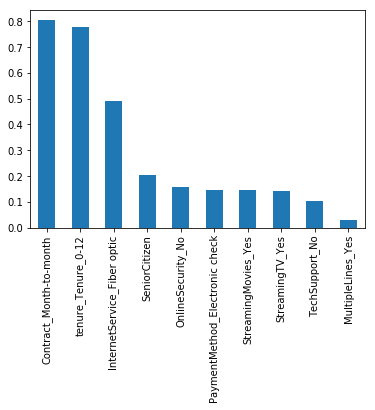

In [983]:
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


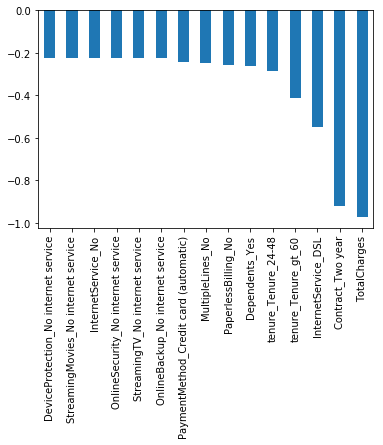

In [984]:
print (weights.sort_values(ascending = False)[-15:].plot(kind='bar'))

# Analysis

As seen from the EDA ,month to month contract had more cases of churn as compared to the others. This 
can be clearly stated by the graph above where month to monnth contract has more weight(high positive coefficient).Also as stated above 
high monthly charges has more instances of churn and so does low value of total charges.
Tenure also plays a major role in predicitng whether the churn will have or not.